<a href="https://colab.research.google.com/github/SomyaH99/Data_analysis_0f_Hotel_bookings/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
%matplotlib inline



In [35]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis/Hotel Bookings.csv'
df = pd.read_csv(path)

Lets Explore our Data

In [36]:
print(df.shape)


(119390, 32)


In [37]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [38]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [40]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Analysis:
1. There are some missing values in some columns like : childern , country,agent, company.
2. Data type of children column is float
3. Data type of reservation_status_date is object which needs to be changed  

Checking the missing values from our dataset


In [42]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The columns agent and company have highest number of missing values 
so we will drop both the columns

In [43]:
# droping the columns with the highest missing values 
df = df.drop(['agent','company'],axis=1)


Removing the rows of missing cells from the columns having less number of
missing values


In [44]:
df= df.dropna(axis=0)

Checking the missing values again


In [45]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Changing the data type of the required column

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [47]:
# changing the datatype of different columns 
df['children'] = df['children'].astype('int64')
df['reservation_status_date'] = df['reservation_status_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d')) 
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month']= df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month']=df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')


Changing the names of some columns to make the data more comprehensive


In [48]:
# changing names of some columns
df.columns = ['hotel','booking_cancel_status','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
             'stays_in_weekend_nights','stays_in_week_nights','no_of_adults','no_of_children','no_of_babies','meal_type','country','market_segment',
             'distribution_channel','repeated_guest_status','no_of_previous_cancellations','no_of_previous_booking_not_cancelled',
             'reserved_room_type','assigned_room_type','no_of_booking_changes','deposit_type',
             'no_of_days_in_waiting_list','customer_type','average_daily_rate','required_no_of_car_parking_space',
             'total_no_of_special_requests','reservation_status','reservation_status_date']


Remove the duplicate rows

In [49]:
# Number of duplicate rows
df[df.duplicated()].shape

(31984, 30)

In [50]:
# dropping the duplicate values
df.drop_duplicates(inplace = True)

In [51]:
df.shape

(86914, 30)

Data analysis and Visualization

                        1. Which hotel type is preferred the most?



In [52]:
# Unique values in the hotel column
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Data visualization through pie chart

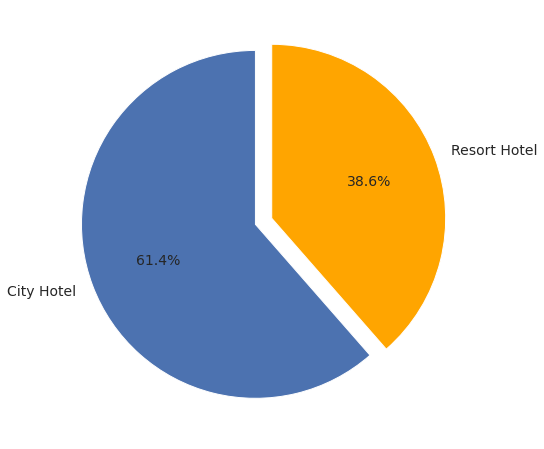

In [53]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

--> 61.4% of people prefer city Hotels 
and 38.6% of people prefer resort hotels

--> It might be possible because of the pricing factor and the location of the hotel 


                            2.Lets analyse the fluctuation in prices during each of the months

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


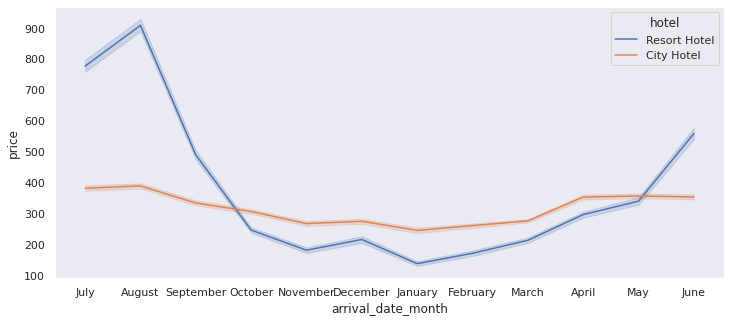

In [55]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_per_person'] = df['average_daily_rate'] / (df['no_of_adults'] + df['no_of_children']) 
actual_guests = df.loc[df["booking_cancel_status"] == '0']
actual_guests['price'] = actual_guests['average_daily_rate'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()



--> There are more fluctuations in price of Resort hotels as      compared to the city hotels

--> The price of resort hotels are higher as compared to the city hotels

                           3. Visualising monthly bookings and monthly cancellations

In [56]:
# taking different values of months count into account.
df_copy= df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy.sample(100)

,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,deposit_type,no_of_days_in_waiting_list,customer_type,average_daily_rate,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,adr_per_person,no_of_bookings
70995,City Hotel,1,146,2017,June,26,27,0,1,3,...,No Deposit,0,Transient,117.00,0,0,Canceled,2017-03-19,39.000,0.500000
63721,City Hotel,1,47,2017,February,7,18,2,4,2,...,No Deposit,0,Transient,89.54,0,1,Canceled,2017-01-30,44.770,0.500000
27937,Resort Hotel,0,28,2016,September,38,12,1,2,2,...,No Deposit,0,Transient-Party,175.00,1,1,Check-Out,2016-09-15,87.500,0.500000
118638,City Hotel,0,184,2017,August,34,20,2,2,2,...,No Deposit,0,Transient,126.00,0,0,Check-Out,2017-08-24,63.000,0.333333
46395,City Hotel,1,22,2015,December,53,31,0,2,2,...,No Deposit,0,Transient,146.00,0,0,Canceled,2015-12-20,73.000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Resort Hotel,0,59,2015,August,36,31,1,3,2,...,No Deposit,0,Transient,105.50,0,2,Check-Out,2015-09-04,52.750,0.333333
6705,Resort Hotel,1,117,2016,June,26,25,3,6,2,...,No Deposit,0,Transient,196.50,0,0,Canceled,2016-05-24,65.500,0.500000
60829,City Hotel,1,308,2016,November,48,23,0,3,1,...,No Deposit,0,Transient-Party,78.30,0,2,Canceled,2016-08-31,78.300,0.500000
49718,City Hotel,1,28,2016,April,17,18,1,0,1,...,No Deposit,0,Transient,95.00,0,0,Canceled,2016-04-15,95.000,0.500000


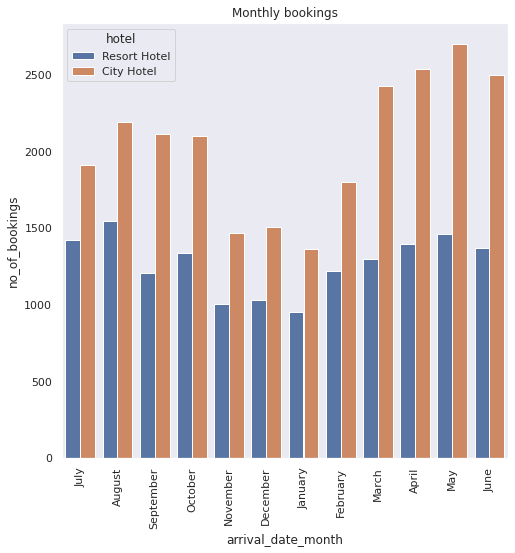

In [57]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly bookings")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy)
plt.xticks(rotation = 90)
plt.show()

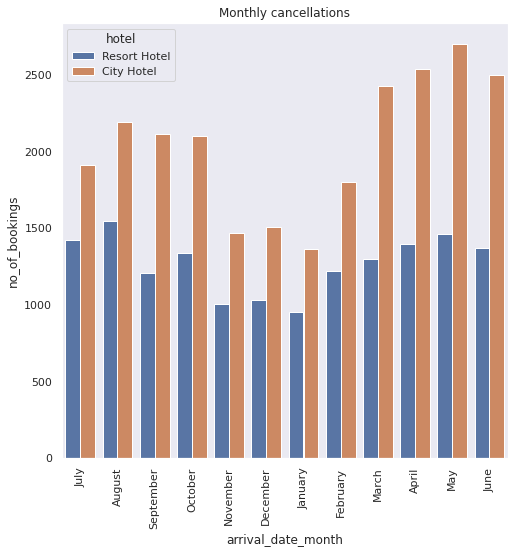

In [58]:
df_copy1= df.copy()
df_copy1['no_of_bookings']= 1
df_copy1.loc[(df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy1.loc[~((df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy1.sample(100)
b= df_copy1[df_copy1.booking_cancel_status == 1]
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.set(style="dark")
plt.title("Monthly cancellations")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy1['hotel'], estimator= sum, data= df_copy1)
plt.xticks(rotation = 90)
plt.show()

--> In City hotels bookings and cancellations are high during the months of April, May , June


--> In case of resort hotels there is not much variations in bookings and cancellations. Bookings and cancellations are highest during the month of August

                                   4. Relationship between lead time and cancellations

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

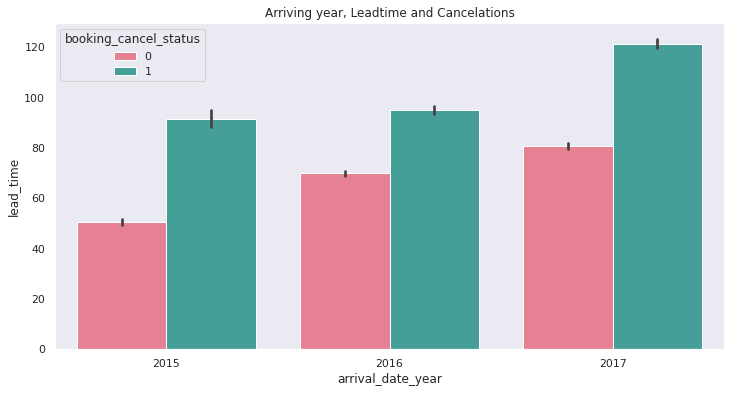

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='booking_cancel_status', data= df, palette='husl')
plt.title('Arriving year, Leadtime and Cancelations')

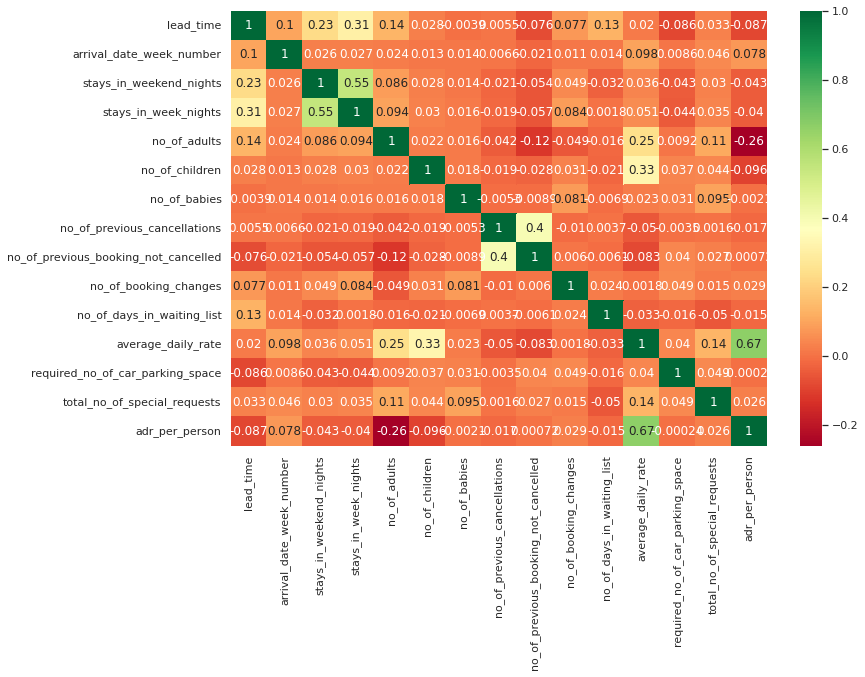

In [60]:
#correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

There is a positive correlation between the lead time and the booking cancellation

                      5.  Analysing which deposit type is preffered the most

In [61]:
df.columns

Index(['hotel', 'booking_cancel_status', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'no_of_adults', 'no_of_children',
       'no_of_babies', 'meal_type', 'country', 'market_segment',
       'distribution_channel', 'repeated_guest_status',
       'no_of_previous_cancellations', 'no_of_previous_booking_not_cancelled',
       'reserved_room_type', 'assigned_room_type', 'no_of_booking_changes',
       'deposit_type', 'no_of_days_in_waiting_list', 'customer_type',
       'average_daily_rate', 'required_no_of_car_parking_space',
       'total_no_of_special_requests', 'reservation_status',
       'reservation_status_date', 'adr_per_person'],
      dtype='object')

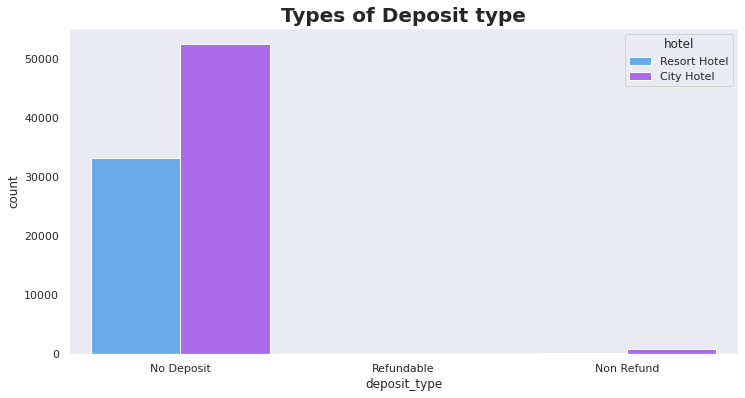

In [62]:
plt.figure(figsize=(12, 6))

sns.countplot(data = df , x = 'deposit_type', hue='hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()